In [1]:
from graph import *
from graph_helper import *
from graph_generator import *
from constants import *
from collections import deque
from input_output import *
from random import shuffle, randint

# Generate trees and corresponding hard graghs

In [2]:
construction_type_1 = CONSTANT    # branch factor = 4, leaf factor = 5
construction_type_2 = RANDOM
graphs = []
trees = []
'''
for i in range(5):
          if i < 3:
                    leafy_tree, hard_graph = create_hard_tree_and_graph(construction_type_1)
          else:
                    leafy_tree, hard_graph = create_hard_tree_and_graph(construction_type_2)
          graphs.append(hard_graph)
          trees.append(leafy_tree)
'''
for i in range(5):
          leafy_tree, hard_graph = create_hard_tree_and_graph(construction_type_2)
          graphs.append(hard_graph)
          trees.append(leafy_tree)

In [3]:
file_name_in = 'hard1.in'
output_graphs_to_new_file(graphs, file_name_in)

In [4]:
file_name_out = 'hard1.out'
output_trees_to_new_file(trees, file_name_out)

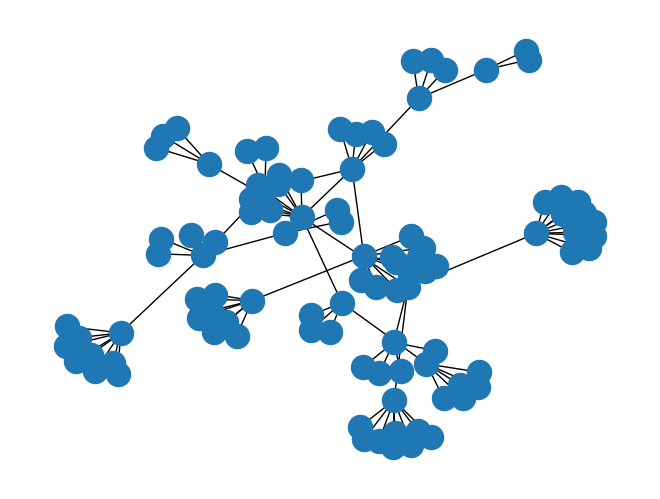

In [5]:
plot_graph(trees[0])

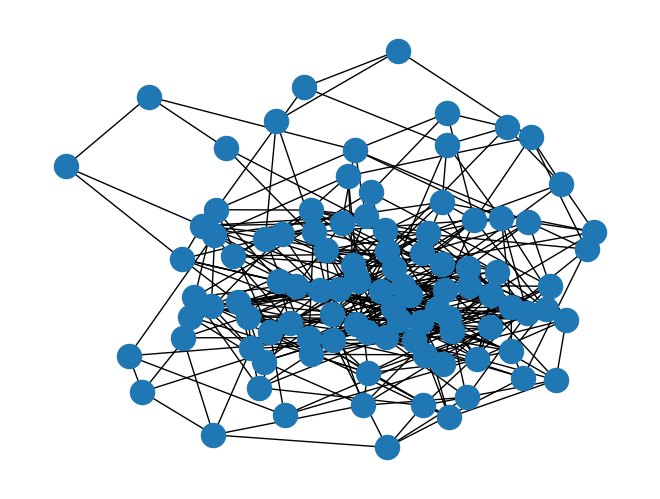

In [6]:
plot_graph(graphs[0])

# Find qualified instances in .in and output them in a new .in

In [69]:
def extract_from_file_in(file_name, idx):

          with open(file_name) as input_file:
                    raw_lines = input_file.readlines()
          
          for i in range(len(raw_lines)):
                    raw_lines[i] = raw_lines[i].strip()
          
          lines = deque(raw_lines[1:])
          idx_list = []
          elem_list = []
          count = 0
          for i in range(len(lines)):
                    tmp = lines[i].split()
                    if len(tmp) == 1:
                              idx_list.append([count, i, int(tmp[0])])
                              count += 1
          elem = idx_list[idx]
          elem_list.append(str(elem[2]))
          for i in range(elem[2]):
                    num_start = i + elem[1] + 1
                    elem_list.append(lines[num_start])
          with open('instance_%d.in' % idx, 'w') as file:
                    for i in elem_list:
                              file.write("%s\n" % i)

          return idx_list, elem_list


In [73]:
idx_instance = 58
idx, list = extract_from_file_in('hard.all.v3.in', idx_instance)

In [75]:
graphs = input_graphs_from_file('hard11.in')

In [77]:
file_name_in = 'hard111.in'
output_graphs_to_new_file(graphs, file_name_in)

# Find qualified instances in .out and output them in a new .out

In [51]:
def extract_from_file_out(file_name, idx):

          with open(file_name) as input_file:
                    raw_lines = input_file.readlines()
          
          for i in range(len(raw_lines)):
                    raw_lines[i] = raw_lines[i].strip()
          
          lines = deque(raw_lines[1:])

          elem_list = []
          list_1 = [0]
          count = 0
          for i in range(len(lines)):
                    if i == 0:
                              tmp_1 = int(lines[i].split()[1])
                              list_1.append(tmp_1)
                              count += 1
                    if i == sum(list_1) + count:
                              tmp_2 = int(lines[i].split()[1])
                              list_1.append(tmp_2)
                              count += 1

          list_1 = list_1[1:]
          num_start = sum(list_1[:idx])+ idx
          for i in range(list_1[idx] + 1):
                    elem_list.append(lines[num_start + i])

          elem_sorted = sorted(elem_list[1:], key=lambda elem: int(elem.split()[0]))
          elem_sorted.insert(0, elem_list[0])

          with open('instance_%d.out' % idx, 'w') as file:
                    for i in elem_sorted:
                              file.write("%s\n" % i)
          
          return list_1, elem_sorted

In [56]:
idx_instance = 58
num_edge_list, instance = extract_from_file_out('hard.all.v3.out', idx_instance)